<a href="https://colab.research.google.com/github/Edimosphy/Symptom-Medicare/blob/main/Symptom_MediCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project overview -Symptom Medicare:**

This health-simulated demo project aims to tackle critical health challenges in Nigeria by providing a smarter way to diagnose diseases based on physical symptoms. It seeks to reduce misdiagnosis and the inappropriate use of antimalarial and antibiotic drugs by the public. By guiding healthcare workers toward more accurate assessments, it will ultimately lead to the earlier detection and diagnosis of diseases, ensuring patients receive the right treatment at the right time.

#**Problems that project aim to address:**

###**Symptom MediCare is designed to:**
 * **Reduce Misdiagnosis:** By guiding healthcare workers toward more accurate assessments.
 * **Prevent Drug Misuse:** Ensuring people use the right medicine for the right illness, reducing inappropriate use of important drugs.
 * **Enable Early Detection:** Leading to earlier diagnosis, so patients receive the right treatment at the right time.


#**Project Features:**

* For our demo, we built a foundational system using Pandas for data handling and probabilistic approaches called Naive Bayes.
* A key feature you'll see in our demo is that after symptoms are entered, we plot a chart to visually show the probability distribution of the likely diseases. This would helps healthcare workers see not just one possible diagnosis, but the relative chances of different illnesses, aiding their decision-making.

* For this demo, we're focusing on Nigeria's most common diseases: Malaria, Typhoid, and HIV/AIDS



#**Future plan and Innovation:**
We look forward to using advanced Machine Learning to build an even more robust AI model. We also aim to introduce databases where vital user information like age, gender, and location can be securely stored. This data will be valuable for medical research and crucial for tracking disease outbreaks across Nigeria and the World at large

###**Symptom Medicare Model - Steps involved**

In [1]:
#Import the necessary librabies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#####For this demo, ten (10) Physical Symptoms will be used for the health simualted

In [2]:
data = {
    'Disease': ['Malaria', 'Malaria', 'Malaria',
                'Typhoid', 'Typhoid', 'Typhoid',
                'HIV/AIDS', 'HIV/AIDS', 'HIV/AIDS'],
    'Fever': ['High', 'Medium', 'High',
              'High', 'High', 'Medium',
              'Medium', 'Low', 'Low'],
    'Fatigue': ['Very High', 'High', 'High',
                'High', 'Medium', 'Low',
                'Very High', 'High', 'High'],
    'Headache': ['High', 'Medium', 'High',
                 'Very High (Heaviness)', 'High', 'Medium',
                 'Low', 'Medium', 'Medium'],
    'Vomiting': ['Yes', 'Yes', 'Yes',
                 'Yes', 'Yes', 'No',
                 'Yes', 'Yes', 'Yes'],
    'Skin Rash': ['Mild', 'Mild', 'None',
                  'Rose spots', 'Mild', 'None',
                  'High', 'High', 'Medium'],
    'Muscle Joint Pain': ['Yes', 'No', 'Medium',
                   'No', 'Yes', 'Medium',
                   'Yes', 'Yes', 'Yes'],
    'Weight Loss': ['Moderate', 'Mild', 'Severe',
                    'Mild', 'Mild', 'Moderate',
                    'Severe', 'Severe', 'Severe'],
    'Diarrhea': ['No', 'Yes', 'No',
                 'Yes', 'No', 'Yes',
                 'Yes', 'Yes', 'Yes'],
    'Night Sweats': ['Yes', 'Yes', 'No',
                 'No', 'No', 'No',
                 'Yes', 'Yes', 'Yes'],
    'Lymph Node Swelling': ['No', 'No', 'No',
                 'No', 'No', 'No',
                 'Yes', 'Yes', 'High']


}

df = pd.DataFrame(data)
df.head()

,Disease,Fever,Fatigue,Headache,Vomiting,Skin Rash,Muscle Joint Pain,Weight Loss,Diarrhea,Night Sweats,Lymph Node Swelling
0,Malaria,High,Very High,High,Yes,Mild,Yes,Moderate,No,Yes,No
1,Malaria,Medium,High,Medium,Yes,Mild,No,Mild,Yes,Yes,No
2,Malaria,High,High,High,Yes,None,Medium,Severe,No,No,No
3,Typhoid,High,High,Very High (Heaviness),Yes,Rose spots,No,Mild,Yes,No,No
4,Typhoid,High,Medium,High,Yes,Mild,Yes,Mild,No,No,No


In [3]:
#To find the unique values, in order to help in getting user input as option
unique_symptoms = {}
for col in df.columns:
    if col != 'Disease': # Exclude the 'Disease' column
        unique_symptoms[col] = sorted(df[col].unique().tolist()) # Sort the unique values

for symptom, values in unique_symptoms.items():
    print(f'{symptom}: {values}')


Fever: ['High', 'Low', 'Medium']
Fatigue: ['High', 'Low', 'Medium', 'Very High']
Headache: ['High', 'Low', 'Medium', 'Very High (Heaviness)']
Vomiting: ['No', 'Yes']
Skin Rash: ['High', 'Medium', 'Mild', 'None', 'Rose spots']
Muscle Joint Pain: ['Medium', 'No', 'Yes']
Weight Loss: ['Mild', 'Moderate', 'Severe']
Diarrhea: ['No', 'Yes']
Night Sweats: ['No', 'Yes']
Lymph Node Swelling: ['High', 'No', 'Yes']


In [4]:
# Symptom input options by mapping the unique option
symptom_option_mapping  = {
    'Fever': {'a': 'High', 'b': 'Low', 'c': 'Medium'},
    'Fatigue': {'a': 'High', 'b': 'Low', 'c': 'Medium', 'd': 'Very High'},
    'Headache': {'a': 'High', 'b': 'Low', 'c': 'Medium', 'd': 'Very High (Heaviness)'},
    'Vomiting': {'a': 'Yes', 'b': 'No'},
    'Skin Rash': {'a': 'Mild', 'b': 'None', 'c': 'High'},
    'Muscle Joint Pain': {'a': 'Yes', 'b': 'No', 'c': 'Medium'},
    'Weight Loss': {'a': 'Mild', 'b': 'Moderate', 'c': 'Severe'},
    'Diarrhea': {'a': 'Yes', 'b': 'No'},
    'Night Sweats': {'a': 'Yes', 'b': 'No'},
    'Lymph Node Swelling': {'a': 'No', 'b': 'Yes', 'c': 'High'}
}



In [5]:
#Get user option for each question
def get_user_symptoms():
    symptoms = {}
    print("Please choose the options that best describe the symptoms you are experiencing:\n")
    symptom_list = list(symptom_option_mapping.keys())
    i = 0  # Initialize an index to keep track of the current symptom

    while i < len(symptom_list):
        symptom = symptom_list[i]
        print(f"\n{symptom}:") # Add a newline for better separation
        for key, val in symptom_option_mapping[symptom].items():
            print(f" {key}) {val}")

        choice = input("Enter your choice: ").strip().lower()

        if choice in symptom_option_mapping[symptom]:
            symptoms[symptom] = symptom_option_mapping[symptom][choice]
            i += 1  # Move to the next symptom if the input is valid
            print("\n")  # Add a newline for better separation
        else:
            print("Invalid response. Please try again for the current symptom.")
            # The loop will continue with the same value of 'i',
            # effectively asking the same question again.

    return symptoms

In [6]:
# Use Naive Bayes prediction
def predict_disease(df, user_symptoms):
    disease_probs = {}
    total_count = len(df)
    diseases = df['Disease'].unique()

    for disease in diseases:
        sub_df = df[df['Disease'] == disease]
        prior = len(sub_df) / total_count
        likelihood = 1.0

        for symptom, value in user_symptoms.items():
            match_count = len(sub_df[sub_df[symptom] == value])
            # Add a small epsilon to the denominator to avoid division by zero if a subgroup has 0 samples
            # However, the primary issue is match_count / len(sub_df). If len(sub_df) is 0, the prior is 0.
            # If match_count is 0 and len(sub_df) is > 0, symptom_prob is 0.
            # The issue arises when all symptom_prob * prior is 0 across all diseases.
            # Use a small value instead of 0.0001 to avoid multiplying by zero and ending up with total_prob = 0
            # This implements Laplace smoothing in a simple way to prevent zero probabilities for unseen combinations.
            # A common approach is adding 1 to the numerator and the number of unique values to the denominator.
            # For simplicity here, we'll ensure the symptom_prob is never exactly zero if the sub_df is not empty.
            symptom_prob = (match_count + 1) / (len(sub_df) + len(df[symptom].unique())) if len(sub_df) else 0.0
            likelihood *= symptom_prob

        # Corrected indentation for this line
        disease_probs[disease] = prior * likelihood

    total_prob = sum(disease_probs.values())

    # Handle the case where total_prob is zero
    if total_prob == 0:
        # No disease matched the symptoms, return a default or handle as an error
        print("No potential disease matches found for the given symptoms in the training data.")
        return "No Match Found", {} # Return a placeholder or error indicator and empty probs
    else:
        for disease in disease_probs:
            disease_probs[disease] = (disease_probs[disease] / total_prob) * 100

        predicted = max(disease_probs, key=disease_probs.get)
        return predicted, disease_probs

In [7]:
# Plot the probabilities for visual display of the disease
def plot_advanced_distribution(probabilities):
    sns.set(style="whitegrid")
    diseases = list(probabilities.keys())
    values = list(probabilities.values())
    colors = sns.color_palette("coolwarm", len(diseases))

    fig, ax = plt.subplots(figsize=(10, 6))
    # Modify this line to include hue and legend=False
    bars = sns.barplot(x=diseases, y=values, palette=colors, ax=ax, hue=diseases, legend=False)

    ax.set_title("Symptom Medicare Disease Prediction", fontsize=16, fontweight='bold')
    ax.set_xlabel("Disease", fontsize=12)
    ax.set_ylabel("Probability (%)", fontsize=12)
    ax.set_ylim(0, 100)

    for bar in bars.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.1f}%', ha='center', fontsize=11, fontweight='semibold')

    plt.show() # Add plt.show() to display the plot

Please choose the options that best describe the symptoms you are experiencing:


Fever:
 a) High
 b) Low
 c) Medium
Enter your choice: a



Fatigue:
 a) High
 b) Low
 c) Medium
 d) Very High
Enter your choice: b



Headache:
 a) High
 b) Low
 c) Medium
 d) Very High (Heaviness)
Enter your choice: a



Vomiting:
 a) Yes
 b) No
Enter your choice: b



Skin Rash:
 a) Mild
 b) None
 c) High
Enter your choice: a



Muscle Joint Pain:
 a) Yes
 b) No
 c) Medium
Enter your choice: b



Weight Loss:
 a) Mild
 b) Moderate
 c) Severe
Enter your choice: a



Diarrhea:
 a) Yes
 b) No
Enter your choice: b



Night Sweats:
 a) Yes
 b) No
Enter your choice: b



Lymph Node Swelling:
 a) No
 b) Yes
 c) High
Enter your choice: a



 Based on your symptoms, the most likely disease is: Typhoid
Prediction Confidence: 78.04%


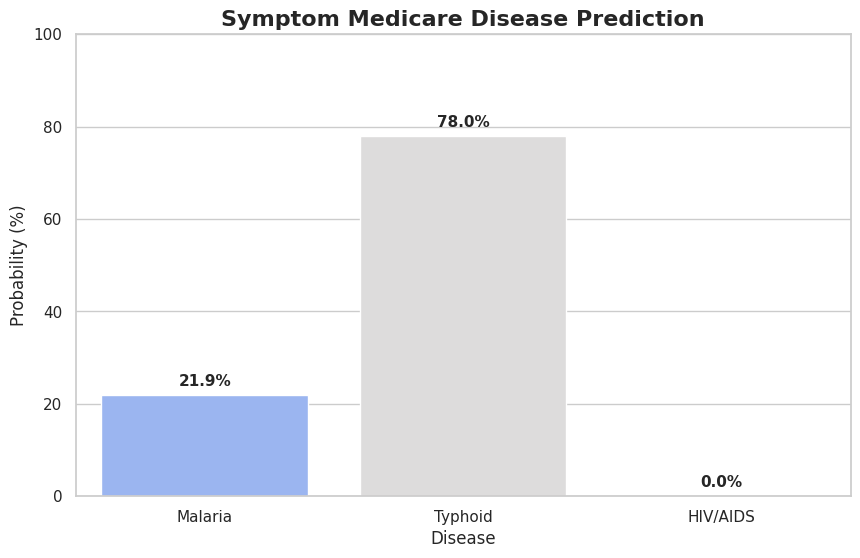

In [9]:
# Main execution
if __name__ == "__main__":
    user_input = get_user_symptoms() # This will now get a predefined set of symptoms
    prediction, probs = predict_disease(df, user_input)

    print(f"\n Based on your symptoms, the most likely disease is: {prediction}")

    # Calculate and print the confidence
    confidence = probs.get(prediction, 0)
    print(f"Prediction Confidence: {confidence:.2f}%")

    if probs:
        plot_advanced_distribution(probs)